The following code will be used to fit a linear regression model on 1 dimensional data.
The model has two parameters, 1) w1 = slope and w0 = intercept. Equations derived in the class will be used to determine the optimal values of these parameters.


Following steps will be performed:
1. Import important python libraries
2. Read data File
3. Visualize data
4. Visualize any arbitrary model 
5. Compute MSE associated with arbitrary model
6. Compute parameters of optimal model
7. Visualize optimal model and associated errors
8. Make prediction for new data

A question needs to be answered in the end.

### 1. Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

### 2. Read Data File

In [2]:
!gdown 1zx8FpL-xz8oXRSf_bUmHJbbSY5cjbKcR

Downloading...
From: https://drive.google.com/uc?id=1zx8FpL-xz8oXRSf_bUmHJbbSY5cjbKcR
To: /Users/ranjithvelm/Documents/VSC/Tensorflow/LR_1D_data.csv
100%|██████████████████████████████████████| 3.78k/3.78k [00:00<00:00, 11.8MB/s]


In [3]:
data = pd.read_csv('LR_1D_data.csv')



In [4]:
data

,y,x
0,6.070736,-1.00
1,9.120318,-0.95
2,4.725397,-0.90
3,9.267612,-0.85
4,8.020143,-0.80
...,...,...
95,-10.355203,3.75
96,-4.428707,3.80
97,-6.005354,3.85
98,-7.609459,3.90


---

### 3. Visualize data

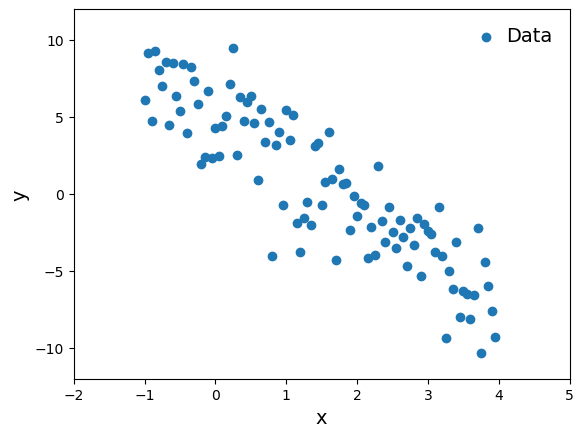

In [5]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim(-2,5)
plt.ylim(-12,12)
plt.legend(frameon=False, handletextpad=0, fontsize=14)

---

### 4. Arbitrary model

In [6]:
def lr_1d_model(w_cap_vec, x_vec = data['x']):
    w0_cap = w_cap_vec[0]
    w1_cap = w_cap_vec[1]
    
    # Model prediction
    pred = x_vec * w1_cap + w0_cap
    return pred

In [7]:
w_cap_arb_vec = [6, -2]
y_cap_arb_vec = lr_1d_model(w_cap_arb_vec)
y_cap_arb_vec

0     8.0
1     7.9
2     7.8
3     7.7
4     7.6
     ... 
95   -1.5
96   -1.6
97   -1.7
98   -1.8
99   -1.9
Name: x, Length: 100, dtype: float64

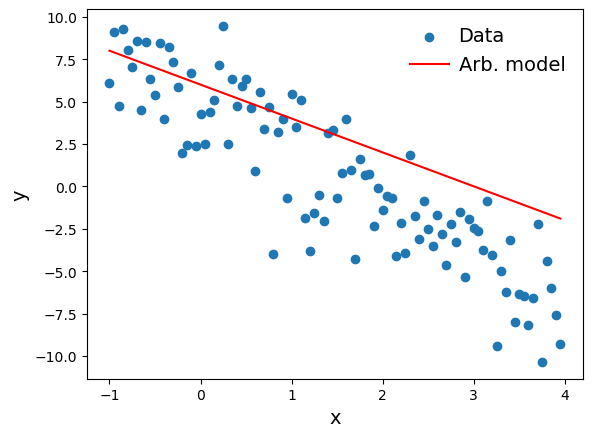

In [8]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
# plt.xlim(-2,5)
# plt.ylim(-500,500)

plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

---

### 5. Compute MSE of arbitrary model

In [9]:
error = data['y'] - y_cap_arb_vec
error

0    -1.929264
1     1.220318
2    -3.074603
3     1.567612
4     0.420143
        ...   
95   -8.855203
96   -2.828707
97   -4.305354
98   -5.809459
99   -7.404869
Length: 100, dtype: float64

In [10]:
mse = np.mean(np.square(error))
print("Mean square error (MSE): %.2f units" %mse)

Mean square error (MSE): 13.36 units


---

### 6. Compute params of optimal model

In [11]:
y_avg = np.mean(data['y'])
x_avg = np.mean(data['x'])

In [12]:
w1_cap_num = np.sum((data['y'] - y_avg) * (data['x'] - x_avg))
w1_cap_den = np.sum((data['x'] - x_avg) ** 2)
w1_cap = w1_cap_num/w1_cap_den
w1_cap

-3.0316709962204405

In [13]:
w0_cap = y_avg - w1_cap * x_avg
w0_cap

5.049697882260526

In [14]:
print("Optimal model parameters are:")
print("w0_cap: %.3f" %w0_cap)
print("w1_cap: %.3f" %w1_cap)

Optimal model parameters are:
w0_cap: 5.050
w1_cap: -3.032


---

### 7. Visualize optimal model

In [15]:
w_cap_vec = [w0_cap, w1_cap]
y_cap_vec = lr_1d_model(w_cap_vec)
w_cap_vec

[5.049697882260526, -3.0316709962204405]

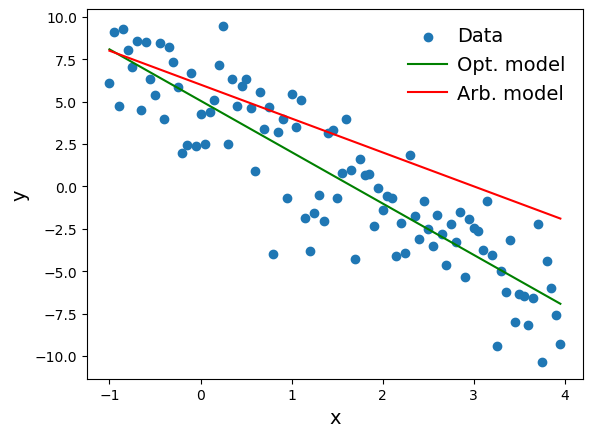

In [16]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
# plt.xlim(-2,5)
# plt.ylim(-500,500)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

In [17]:
error = data['y'] - y_cap_vec
mse = np.mean(np.square(error))
print("Mean square error (MSE): %.2f units" %mse)

Mean square error (MSE): 5.03 units


---

### 8. Make prediction for new data

In [18]:
new_x_vec = np.array([-1.8,-1.4,4.3,4.6])

In [19]:
new_y_cap_pred_vec = lr_1d_model(w_cap_vec=w_cap_vec, x_vec=new_x_vec)
new_y_cap_pred_vec

array([10.50670568,  9.29403728, -7.9864874 , -8.8959887 ])

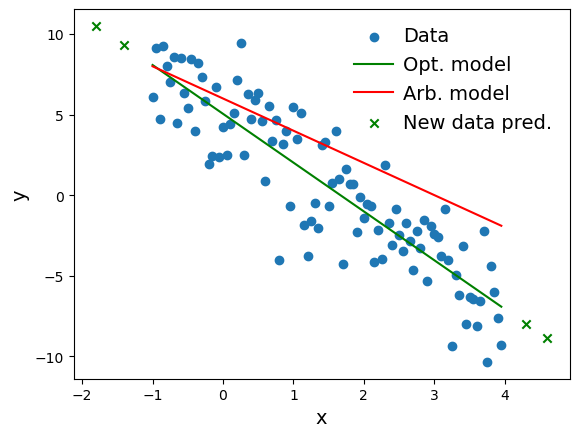

In [20]:
plt.scatter(data['x'], data['y'], label='Data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
# plt.xlim(-2,5)
# plt.ylim(-500,500)

plt.plot(data['x'], y_cap_vec, c='g', label='Opt. model')
plt.plot(data['x'], y_cap_arb_vec, c='r', label='Arb. model')
plt.scatter(new_x_vec, new_y_cap_pred_vec, c='g', marker='x', label='New data pred.')

plt.legend(frameon=False, handletextpad=0.5, fontsize=14)

---

### Question

Plot mean square error (MSE) for various values of w_vec (use the code associated with arbitrary model). It will be a 3-D plot with MSE on z-axis, w0_vec on x-axis and w1_vec on y-axis. Does the MSE plot have multiple minimas?  

Arbitrary values are taken for w0 and w1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!gdown 1zx8FpL-xz8oXRSf_bUmHJbbSY5cjbKcR

In [ ]:
data = pd.read_csv('LR_1D_data.csv')



In [ ]:
def lr_1d_model(w_cap_vec, x_vec = data['x']):
    w0_cap = w_cap_vec[0]
    w1_cap = w_cap_vec[1]
    
    # Model prediction
    pred = x_vec * w1_cap + w0_cap
    return pred

In [21]:
w0_vec =  [0,1,2,3,4,5,6,7,8,9,10]
w1_vec = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5]
w0 = []
w1 = []
mse_vec = []

In [22]:
for i in w0_vec:
    for j in w1_vec:
        w0.append(i)
        w1.append(j)
        y_cap = lr_1d_model([i,j])
        err = data['y'] - y_cap
        mse_old = np.mean(np.square(err))
        mse_vec.append(mse_old)



[5.033024173092543, 5, -3]

Minimum point in the graph and their corresponding w0 and w1 values are found.

In [ ]:
a = int(mse_vec.index(min(mse_vec)))
min_point=[min(mse_vec), w0[a], w1[a]]
min_point

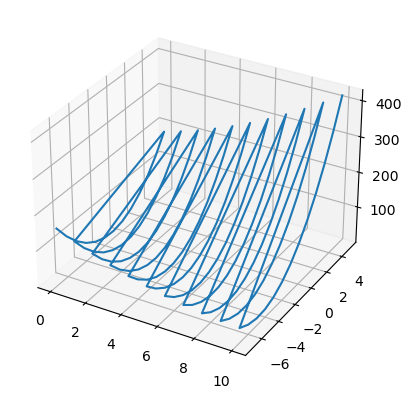

In [23]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(w0, w1, mse_vec)
